# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)   
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.  
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).  


1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей работает хуже, чем логистическая регрессия. 

2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), 
на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

4. Сгенерировать датасет для задачи регрессии (MSE),
на котором решающее дерево работает хуже, чем линейная регрессия. 


No Free Lunch Theorem гласит, что не существует такого классификатора, который бы подошёл под все виды данных. На каких-то данных классфикатор обязательно должен сработать плохо, так как используемый метод классификации не релевантен для таких данных.

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import random

### 1. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.

##### Предположения относительно данных:
* __Метод ближайших соседей__

Метод основан на предположении о том, что близким объектам в признаковом пространстве соответствуют похожие метки, то есть объекты собираются в "плеяды" (разделимые множества точек).
* __Логистическая регрессия__

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей на две соответствующих классам области. В каждой такой области находятся разные классы.

##### Какая выборка нужна для доказательства No Free Lunch Theorem
Для нахождения расстояния в методе ближайших соседей используется Евклидово расстояние, поэтому между объектами одного класса оно должно быть минимальным (тогда KNN сработает плохо). Классы должны быть хорошо разделимы линией (тогда LR сработает хорошо). Таким является выборка, когда у нас есть две параллельные прямые линии, которые располагаются близко друг к другу: если взять одну точку на линии **a**, то минимальным расстоянием оказывается точка на линии **b**, а не на линии **a**. Такие параллельные прямые отлично разделяются прямой.

In [2]:
def generate_LR(num_obj=100):
    arr = np.array(range(0, num_obj, 2))
    x0 = arr.reshape(-1, 1)
    y0 = arr.reshape(-1, 1)
    zero = np.hstack([x0, y0])
    x1 = arr.reshape(-1, 1)
    y1 = np.array([x+1 for x in x1]).reshape(-1, 1)
    one = np.hstack([x1, y1])
    X = np.concatenate((zero, one), axis=0)
    Y = np.concatenate((np.zeros(len(one)), np.ones(len(zero))))
    return X, Y

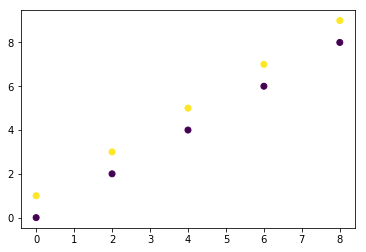

In [3]:
X, Y = generate_LR(num_obj=10)
plt.scatter(X[:,0], X[:,1], c=Y)

In [4]:
def first(num_obj=1000):
    X, Y = generate_LR(num_obj=num_obj)
    LR = LogisticRegression()
    print('LogisticRegression:', np.mean((cross_val_score(LR, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))
    KNN = KNeighborsClassifier()
    print('KNeighborsClassifier:', np.mean((cross_val_score(KNN, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))

In [5]:
first()

LogisticRegression: 1.0
KNeighborsClassifier: 0.0


Видим, что логистическая регрессия сработала лучше, чем метод ближайших соседей. Объяснение см. выше.

### 2. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

##### Какая выборка нужна для доказательства No Free Lunch Theorem
Здесь ровно наоборот мыдолжный создать датасет, который бы выглядел обосбленными множествами в пространстве, чтобы между ними невозможно было провести прямую (с помощью логистической регрессии).

In [6]:
def generate_KNN(num_obj):
    x, y = [], []
    centers = (1, 1), (100, 100), (100, 1), (1, 100)
    for center in centers:
        for n in range(num_obj):
            x.append(random.gauss(center[0],1))
            y.append(random.gauss(center[1],1))
    X = np.dstack((x, y))[0]
    Y = np.concatenate((np.zeros(num_obj*2), np.ones(num_obj*2)))
    return X, Y

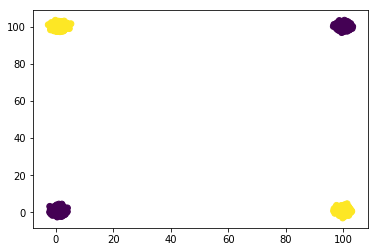

In [7]:
X, Y = generate_KNN(num_obj=1000)
plt.scatter(X[:,0], X[:,1], c=Y)

In [8]:
def second(num_obj=1000):
    X, Y = generate_KNN(num_obj=num_obj)
    LR = LogisticRegression()
    print('LogisticRegression:', np.mean((cross_val_score(LR, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))
    KNN = KNeighborsClassifier()
    print('KNeighborsClassifier:', np.mean((cross_val_score(KNN, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))

In [9]:
second()

LogisticRegression: 0.1
KNeighborsClassifier: 1.0


KNN в данном тесте сработал намного лучше, чем логистическая регрессия. С помощью LR невозможно провести линию, чтобы она разделяла классы хорошо. При KNN объекты одного класса находятся ближе, чем объекты другого, поэтому работает на 100%.

### 3. Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

##### Предположения относительно данных:
* __Метод ближайших соседей с косинусной метрикой__
Объекты одного класса имеют меньший угол между их векторами, чем объекты другого класса.

* __Метод ближайших соседей с евклидовой метрикой__

Используется в 2 предыдущих пунктах (кластеры на плоскости).

##### Какая выборка нужна для доказательства No Free Lunch Theorem
Здесь мы должны взять такую выборку, чтобы косинусное расстояние объектов одного класса было минимально. Минимально оно того, когда вектора совпадают, то есть угол равен 0. Такой случай - две прямые: точки расположены на одной прямой - векторе. У нас в 1 задании уже сгенерирован такой датасет.

In [10]:
def third(num_obj=1000):
    X, Y = generate_LR(num_obj=num_obj)
    KNN_cos = KNeighborsClassifier(metric='cosine')
    print('KNeighborsClassifier(cosine):', np.mean((cross_val_score(KNN_cos, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))
    KNN = KNeighborsClassifier()
    print('KNeighborsClassifier(euclidean):', np.mean((cross_val_score(KNN, X, Y, scoring='accuracy', cv=KFold(5, random_state=231)))))

In [11]:
third()

KNeighborsClassifier(cosine): 0.999
KNeighborsClassifier(euclidean): 0.0


Как и предполагалось, так как угол равен нулю, косинусное расстояние самое маленькое, какое только может быть. С помощью косинусной метрики KNN справляется с классификацией такой выборки на 100%. А евклидовое расстояние между объектом одного и другого класса будет меньше, чем у одного и того же класса.

### 4. Сгенерировать датасет для задачи регрессии (MSE), на котором решающее дерево работает хуже, чем линейная регрессия.

##### Предположения относительно данных:
* __Линейная регрессия__

Линейная регрессия - это способ отобразить и описать форму зависимости между двумя обьектами линейной функцией зависимости.

* __Решающее дерево__

Для любой выборки можно построить решающее дерево, не допускающее на ней ни одной ошибки. Классы делятся линиями, которые параллельны осям координат.

##### Какая выборка нужна для доказательства No Free Lunch Theorem
Из вывода о том, что линии должны быть параллельны осям координат, можно предположиться, что если у нас будет прямая, то логистическая регрессия точно опишет зависимость между объектами, а решающее дерево будет приближаться к ней, но никогда не будет точной.

In [12]:
def generate_LinR(num_obj=1000):
    X = np.linspace(0, num_obj, num_obj).reshape(-1, 1)
    Y = np.linspace(0, num_obj, num_obj)
    return X, Y

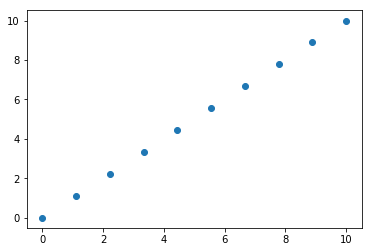

In [13]:
X, Y = generate_LinR(num_obj=10)
plt.scatter(X, Y)

In [14]:
def forth(num_obj=1000):
    X, Y = generate_LinR(num_obj=num_obj)
    DT = DecisionTreeRegressor()
    print('DecisionTreeRegressor:', np.mean((cross_val_score(DT, X, Y, scoring='mean_squared_error', cv=KFold(5, random_state=231)))))
    LR = LinearRegression()
    print('LinearRegression:', np.mean((cross_val_score(LR, X, Y, scoring='mean_squared_error', cv=KFold(5, random_state=231)))))

In [15]:
forth()

DecisionTreeRegressor: -7418.329240151063
LinearRegression: -5.105430159607695e-26


Предположение подтвердилось (пояснение перед экспериментом).